# Finding Heavy Traffic Indicators on I-94

### 1. The I-94 Traffic Dataset:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# Reading from csv file
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
# Displaying head and tail of dataset
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### 2. Analyzing Traffic Volume

First, we want to know the distribution for each traffic volume.

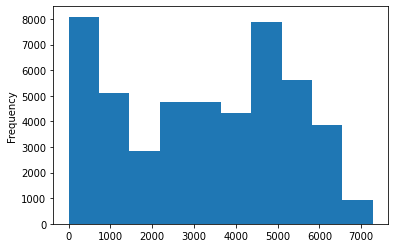

In [5]:
# Examining the distrubution of the "traffic_volume" column
i_94["traffic_volume"].plot.hist()
plt.show()

In [6]:
# Lookup for statistics in datasets
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From this data we know that the most traffic volume in I-94 is 0-1000 and 4000-5000.

### 3. Traffic Volume: Day vs. Night

Previously, we analyzed the distribution of traffic_volume and found the following:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
# Transform the date_time column to datetime format
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

In [8]:
# Isolate the daytime and nighttime dataset
day = i_94[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
night = i_94[(i_94["date_time"].dt.hour < 7) | (i_94["date_time"].dt.hour >= 19)]

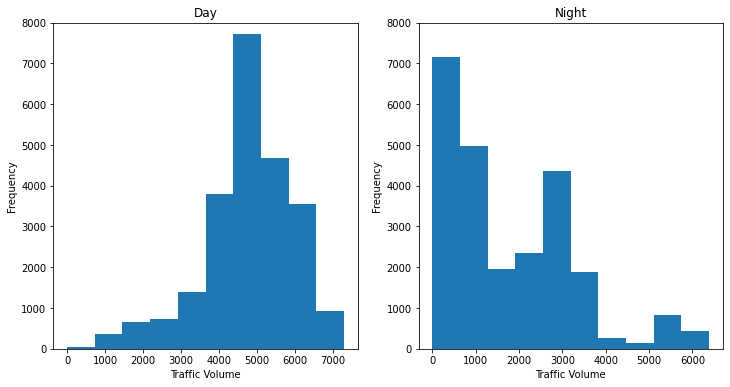

In [9]:
# Creating the grid chart
plt.figure(figsize=(12, 6))

# histogram for day
plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.title("Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)

# histogram for night
plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.title("Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)

plt.show()

In [10]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

> #### From above histogram, it can be concluded that **traffic volume in daytime is heavier than in nighttime**

Since the traffic is light at night, we can ignore it and only use day dataset.

### 4. Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

1. Month
2. Day of the week
3. Time of day

#### A. Month

In [12]:
# Group the date by month
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()

<ipython-input-12-16a1b9e5aad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month"] = day["date_time"].dt.month


In [13]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


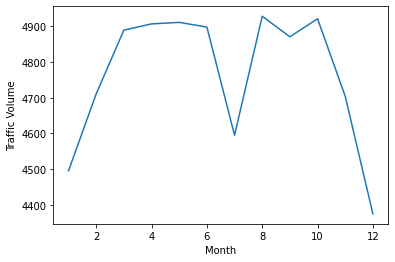

In [14]:
# Generate a line plot to visualize how the traffic volume changed each month
plt.plot(by_month["traffic_volume"])
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.show()

> From that data it is shown that the heaviest traffic volume is in March to June, and declining in July. It is arose again August to October before declining again in end of the year

#### B. Day of the Week

In [15]:
# Group the date by month
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()

<ipython-input-15-b52b015267bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["dayofweek"] = day["date_time"].dt.dayofweek


In [16]:
by_dayofweek  # 0 is Monday, 6 is Sunday

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
dayofweek,,,,,,
0,282.262755,2.923823,0.000017,57.508053,4893.551286,6.401243
1,282.301770,0.129172,0.000194,52.333234,5189.004782,6.458757
2,282.198316,0.068099,0.001091,53.662119,5284.454282,6.619158
3,282.279115,0.172436,0.000148,53.993191,5311.303730,6.501184
4,282.181216,0.092828,0.000225,51.412200,5291.600829,6.575067
5,282.300646,0.107596,0.000094,50.446376,3927.249558,6.498821
6,282.280340,0.133170,0.000000,52.288699,3436.541789,6.604179


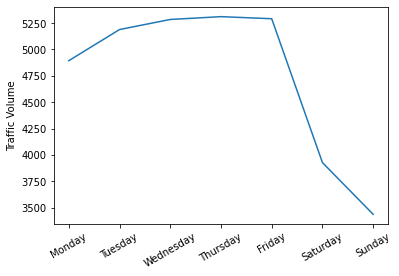

In [17]:
# Generate a line plot to visualize how the traffic volume changed each day of week
plt.plot(by_dayofweek["traffic_volume"])
plt.xticks(
    [0, 1, 2, 3, 4, 5, 6],
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    rotation=30,
)
plt.ylabel("Traffic Volume")
plt.show()

> Business days tend to be more heavier traffic than in weekends

#### C. Time of Day

In [18]:
# Group the date by Time
day["hour"] = day["date_time"].dt.hour
bussiness_days = day.copy()[day["dayofweek"] <= 4]  # 4 == Friday
weekend = day.copy()[day["dayofweek"] >= 5]  # 5 == Saturday
by_hour_business = bussiness_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

<ipython-input-18-23d8938fafe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["hour"] = day["date_time"].dt.hour


In [19]:
print("By Hour Business")
by_hour_business.head()

By Hour Business


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.662639,0.145105,0.000068,50.538983,6030.413559,6.363390,1.984407
8,278.938443,0.144614,0.000135,53.666441,5503.497970,6.567659,1.989175
9,279.628421,0.156829,0.000139,53.619709,4895.269257,6.484386,1.981263
10,280.664650,0.113984,0.000033,54.781417,4378.419118,6.481283,1.957888
11,281.850231,0.151976,0.000000,52.808876,4633.419470,6.448819,1.979957


In [20]:
print("By Hour Weekend")
by_hour_weekend.head()

By Hour Weekend


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek
hour,,,,,,,
7,278.095331,0.291540,0.000000,50.006623,1589.365894,6.518212,5.501656
8,277.981017,0.083870,0.000083,48.877076,2338.578073,6.523256,5.503322
9,279.785660,0.075234,0.000364,49.688042,3111.623917,6.603120,5.492201
10,280.403811,0.079674,0.000103,48.915808,3686.632302,6.491409,5.503436
11,282.129355,0.141387,0.000000,52.372973,4044.154955,6.482883,5.491892


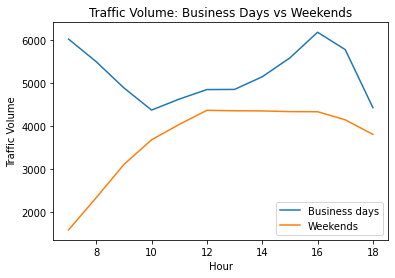

In [21]:
plt.plot(by_hour_business["traffic_volume"], label="Business days")
plt.plot(by_hour_weekend["traffic_volume"], label="Weekends")
plt.title("Traffic Volume: Business Days vs Weekends")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()

plt.show()

> From the diagram above, it is shown that there is a shifting a rush hour between business days and weekends. In business days traffic is heavier when people start activity and when going back to home. While in weekends, the traffic is heavier in afternoon when people start doing leisure activity.

### 5. Weather Indicators

Next, we will find correlation between traffic_volume and the numerical weather columns.

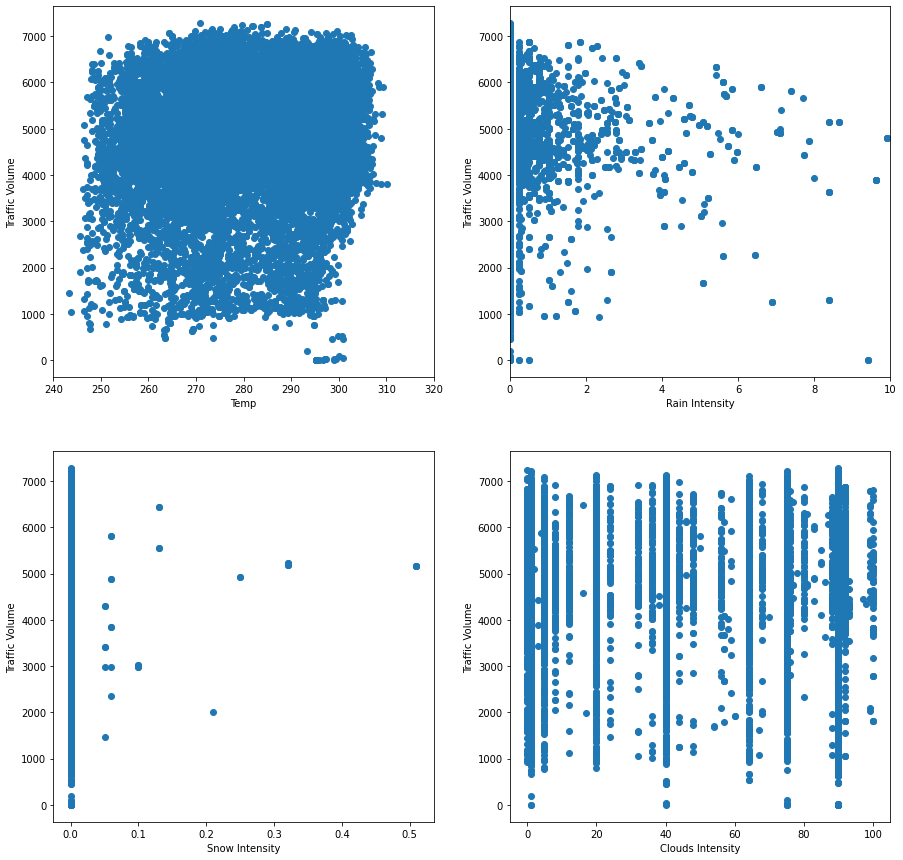

In [22]:
# Creating grid chart
plt.figure(figsize=(15, 15))

# Scatter plot for temp
plt.subplot(2, 2, 1)
plt.scatter(day["temp"], day["traffic_volume"])
plt.xlabel("Temp")
plt.xlim(240, 320)
plt.ylabel("Traffic Volume")

# Scatter plot for rain_1h
plt.subplot(2, 2, 2)
plt.scatter(day["rain_1h"], day["traffic_volume"])
plt.xlabel("Rain Intensity")
plt.xlim(0, 10)
plt.ylabel("Traffic Volume")

# Scatter plot for snow_1h
plt.subplot(2, 2, 3)
plt.scatter(day["snow_1h"], day["traffic_volume"])
plt.xlabel("Snow Intensity")
plt.ylabel("Traffic Volume")

# Scatter plot for clouds_all
plt.subplot(2, 2, 4)
plt.scatter(day["clouds_all"], day["traffic_volume"])
plt.xlabel("Clouds Intensity")
plt.ylabel("Traffic Volume")

plt.show()

> It seems weather columns does not effect the traffic volume, hence it is not a reliable indicators for heavy traffic

### 6. Weather Types

We're going to calculate the average traffic volume associated with each unique value in these two columns. we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [23]:
# Group the weather by the mean
by_weather_main = day.groupby("weather_main").mean()
by_weather_description = day.groupby("weather_description").mean()

In [24]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,3.138928,12.404248
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,3.005631,12.911974
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2.934315,12.308041
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2.798343,10.325967
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2.754197,12.467626


In [25]:
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,293.232549,0.000000,0.0,0.000000,4919.009390,7.557512,2.895540,12.453052
broken clouds,282.372927,0.000000,0.0,72.635875,4824.130326,6.675260,2.998210,12.811314
drizzle,283.573777,0.145072,0.0,88.589928,4737.330935,7.244604,3.028777,11.697842
few clouds,284.272965,0.000000,0.0,19.391951,4839.818023,6.159230,2.977253,12.633421


#### traffic_volume vs. by_weather_main

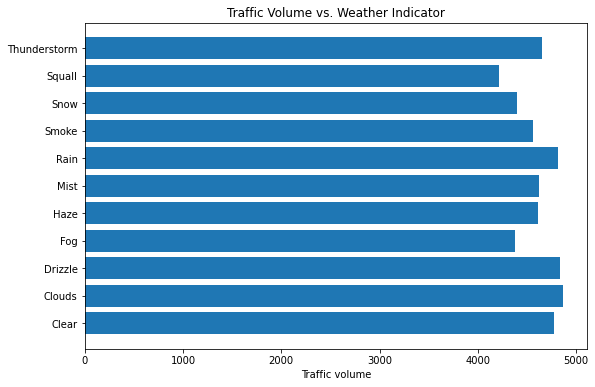

In [26]:
plt.figure(figsize=(9, 6))
plt.barh(by_weather_main.index, by_weather_main["traffic_volume"])
plt.title("Traffic Volume vs. Weather Indicator")
plt.xlabel("Traffic volume")
plt.show()

#### traffic_volume vs. by_weather_main

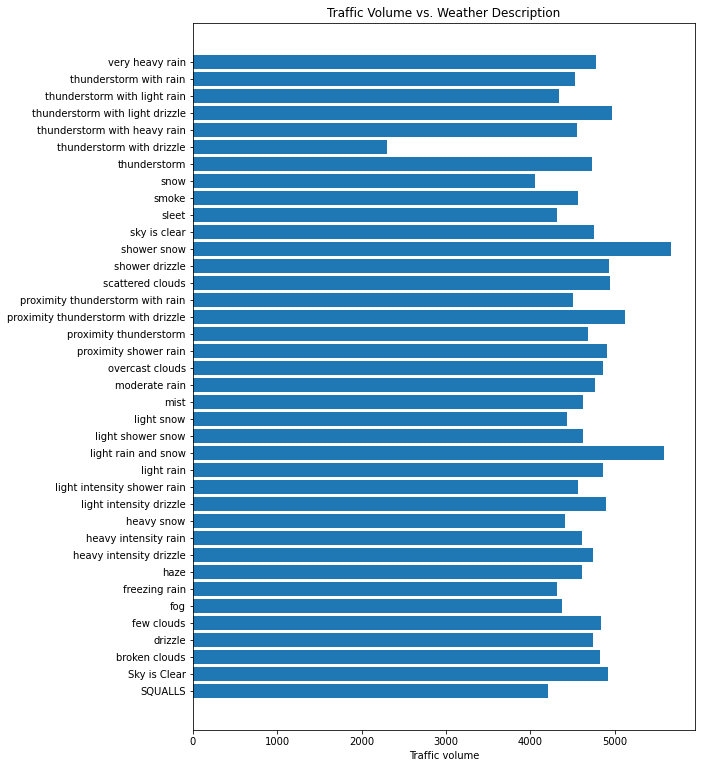

In [27]:
plt.figure(figsize=(9, 13))
plt.barh(by_weather_description.index, by_weather_description["traffic_volume"])
plt.title("Traffic Volume vs. Weather Description")
plt.xlabel("Traffic volume")
plt.show()

>It looks like there are three weather types where traffic volume exceeds 5,000:
>1. **Shower snow**
>2. **Light rain and snow**
>3. **Proximity thunderstorm with drizzle** 

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.



### 7. Conclusion

We managed to find two types of indicators:
1. **Time indicators**
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
    
2. **Weather indicators**
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle